## Cross Validation for Logistic Regression, Random Forest and Support Vector Machine


In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import string 

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

#libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from sklearn.metrics import classification_report

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [3]:
# Load Dataset

filename = 'Descripcion.csv' 
DataSet0 = pd.read_csv(filename)
DataSet0


,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1460,Presentacion Moodle,1.053860e+09,No definido,NaN,NaN,NaN,SIGMA Ingeniería S.A,SIGMA
1,TIK1005,Revision Presentacion Aliado de Negocio JEEP,2.434445e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
2,TIK1006,Se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
3,TIK1015,Análisis Calidad y verificaciones.,1.058818e+09,No definido,NaN,NaN,NR,Codensa,Geolumina
4,TIK7096,Capa predial Cartagena,2.434355e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
...,...,...,...,...,...,...,...,...,...
13601,TIK11085,BARRA HERRAMIENTAS PENDIENTE VEHICULO,1.053771e+09,1- Nuevo requerimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
13602,TIK11506,Generar nueva app de conductor de bioagricola,1.059712e+09,1- Nuevo requerimiento,NaN,NaN,NR,Bioagrícola del Llano,Geoaseo
13603,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
13604,TIK11509,Creación de un usuario de consulta para la Con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [4]:

PorBorrar1 = DataSet0[DataSet0['descripcion'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['nombre_cliente'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['Linea_Negocio'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

PorBorrar1 = DataSet0[DataSet0['categoria'] == '1- Nuevo requerimiento'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'] == 'No definido'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

In [5]:

DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construcción, mantenimiento y migración de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicación servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creación de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [6]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"á", "a")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"é", "e")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"í", "i")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ó", "o")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ú", "u")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ñ", "n")
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuracion de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construccion, mantenimiento y migracion de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicacion servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creacion de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [7]:
punct = string.punctuation
for c in punct:
    DataSet0['descripcion'] = DataSet0['descripcion'].replace(c, " ")
# print(DataSet0['descripcion'] )
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuracion de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construccion, mantenimiento y migracion de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicacion servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creacion de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [8]:
patterns_labels = ['Configuración GPS',
                    'Revisión de formularios',
                    'Auditoria del sistema / interrupción completa de servicio',
                    'Informes de reporte y mantenimiento',
                    'Configuración de visor',
                    'Creación / inactivación  de usuario',
                    'Datos erróneos en reporte / actualización de reportes',
                    'Disminución de desempeño de plataforma',
                    'Carga de datos masiva, gestión de tickets',
                    'No envia el backup de app móvil / no cargan datos en app',
                    'Cambiar datos por BD, Cambiar estado de OT',
                    'Capacitación de módulo o funcionalidad',
                    'Creación de servicios / publicación de servicios' ]

                   
                              
patterns_colors = ['indigo', 'tab:orange', 'maroon', 'tab:olive' , 'tab:brown' , 'lawngreen',
                  'tab:pink' ,'r', 'g', 'b', 'c' , 'm' , 'y'] # 'k' , '#6E2C00']

correct_Pattern_labels = DataSet0['categoria'].values


DataSet0 = DataSet0.drop(['tik_codigo','propietario', 'modulo', 'producto', 'ans'], axis=1)

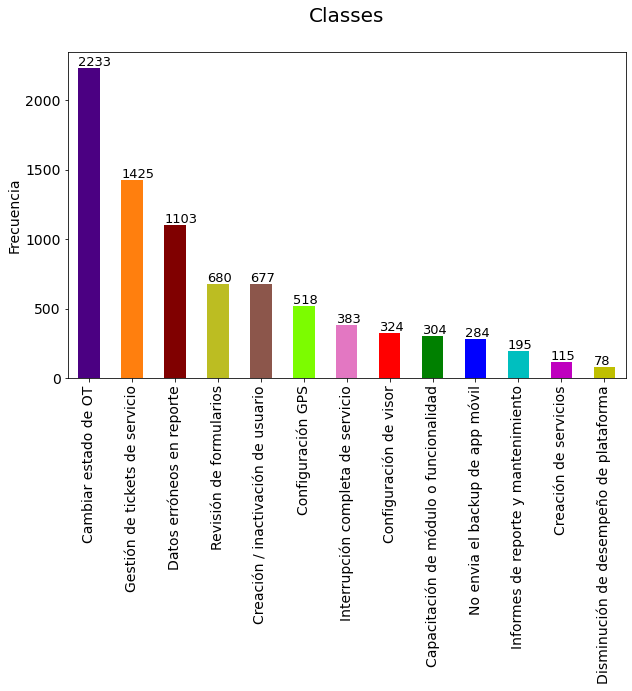

In [9]:
# class distribution
ax = DataSet0['categoria'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14, color=patterns_colors)
# ax = DataSet['Classes'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 5)), fontsize=13)

In [47]:
# class distribution
print('DataSet category distrubution: \n')
print(DataSet0.groupby('categoria').size())

DataSet category distrubution: 

categoria
Cambiar estado de OT                      2233
Capacitación de módulo o funcionalidad     304
Configuración GPS                          518
Configuración de visor                     324
Creación / inactivación de usuario         677
Creación de servicios                      115
Datos erróneos en reporte                 1103
Disminución de desempeño de plataforma      78
Gestión de tickets de servicio            1425
Informes de reporte y mantenimiento        195
Interrupción completa de servicio          383
No envia el backup de app móvil            284
Revisión de formularios                    680
dtype: int64


In [48]:
X = DataSet0['descripcion']
y = DataSet0['categoria']

X


0       se debe realizar la configuracion de los servi...
1                              crear servicios geoserver 
2                              crear servicios geoserver 
3       construccion, mantenimiento y migracion de la ...
4                          publicacion servicio geoserver
                              ...                        
8314    cordial saludo, adjunto la carga de tickets de...
8315    por favor actualizar las capas de macros, micr...
8316                          modificar perfil de rioaseo
8317    creacion de un usuario de consulta para la con...
8318    solicito amablemente realizar el cargue de ope...
Name: descripcion, Length: 8319, dtype: object

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=42)

In [50]:
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8319,) (8319,) (6655,) (6655,) (1664,) (1664,)


In [51]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape, X_test.shape)

(6655, 3637) (1664, 3637)


### Application of Cross Validation to the selected techniques (LG, RF, SVM) with the parameters provided in the previous optimization processes 

In [16]:
# Evaluate Some Algorithms

# Now it is time to create some models of the data and estimate their accuracy on unseen data.

# Here is what we are going to cover in this step:

# Separate out a validation dataset.
# Set-up the test harness to use 10-fold cross validation.
# Select the best model.
# You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

# We will use 10-fold cross validation to estimate accuracy.

# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(C=25, tol = 0.0)))
models.append(('RF', RandomForestClassifier(n_estimators=95,ccp_alpha=0.00046,criterion='entropy',random_state=277)))
models.append(('SVC', SVC(C=100000, gamma=0.0001)))
#LR-RF-SVC

###  Cross Validation technique without balancing and with parameter optimization

In [17]:
# CROSS VALIDATION
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

LR: 0.759881 (0.012693)
RF: 0.764090 (0.012810)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVC: 0.748915 (0.013935)


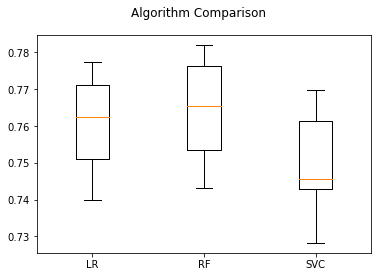

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###  Applying data balancing with SMOTE library

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Aplicamos SMOTE únicamente a la data de entrenamiento para no dañar la data de testing 
# tenemos en cuenta que con SMOTE hacemos balanceo hacia la clase de mayor frecuencia
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train) # para aplicar solo a la data de training    # sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (8319,)
Shape of X after SMOTE: (23088, 3637)

Balance of positive and negative classes (%):


Revisión de formularios                   7.692308
Informes de reporte y mantenimiento       7.692308
Creación de servicios                     7.692308
Creación / inactivación de usuario        7.692308
Disminución de desempeño de plataforma    7.692308
Capacitación de módulo o funcionalidad    7.692308
Configuración de visor                    7.692308
Interrupción completa de servicio         7.692308
Gestión de tickets de servicio            7.692308
Cambiar estado de OT                      7.692308
Datos erróneos en reporte                 7.692308
Configuración GPS                         7.692308
No envia el backup de app móvil           7.692308
Name: categoria, dtype: float64

###  Cross Validation technique with oversampling and with parameter optimization

In [21]:
# CROSS VALIDATION
# evaluate each model in turn

# Redefinimos la data de train y testing a partir del balanceo de datos al mayor realizado 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

LR: 0.959502 (0.005462)
RF: 0.942555 (0.005534)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVC: 0.962805 (0.004399)


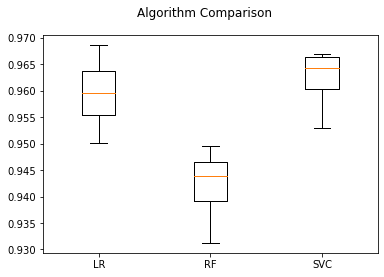

In [22]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Application of Cross Validation to the selected techniques (LG, RF, SVM) with default parameters

In [52]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
#LR-RF-SVC

###  Cross Validation technique without balancing and without parameter optimization

In [53]:
# CROSS VALIDATION
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

LR: 0.755224 (0.008014)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RF: 0.770702 (0.011958)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVC: 0.751469 (0.013594)


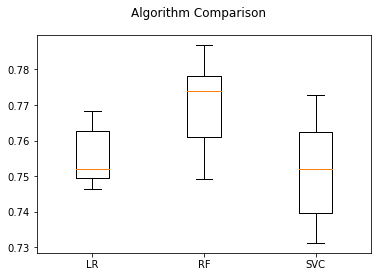

In [54]:
# Comparación de las técnicas aplicadas mediante cross validation por medio
# de diagramas de caja y bigotes

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###  Applying data balancing with SMOTE library

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Aplicamos SMOTE únicamente a la data de entrenamiento para no dañar la data de testing 
# tenemos en cuenta que con SMOTE hacemos balanceo hacia la clase de mayor frecuencia
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train) # para aplicar solo a la data de training    # sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (8319,)
Shape of X after SMOTE: (23088, 3637)

Balance of positive and negative classes (%):


Revisión de formularios                   7.692308
Informes de reporte y mantenimiento       7.692308
Creación de servicios                     7.692308
Creación / inactivación de usuario        7.692308
Disminución de desempeño de plataforma    7.692308
Capacitación de módulo o funcionalidad    7.692308
Configuración de visor                    7.692308
Interrupción completa de servicio         7.692308
Gestión de tickets de servicio            7.692308
Cambiar estado de OT                      7.692308
Datos erróneos en reporte                 7.692308
Configuración GPS                         7.692308
No envia el backup de app móvil           7.692308
Name: categoria, dtype: float64

###  Cross Validation technique with oversampling and without parameter optimization

In [57]:
# CROSS VALIDATION
# evaluate each model in turn

# Redefinimos la data de train y testing a partir del balanceo de datos al mayor realizado 

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Cada algoritmo se evaluó 10 veces (validación cruzada 10 veces)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

LR: 0.934759 (0.006315)
RF: 0.952193 (0.005205)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVC: 0.964591 (0.003093)


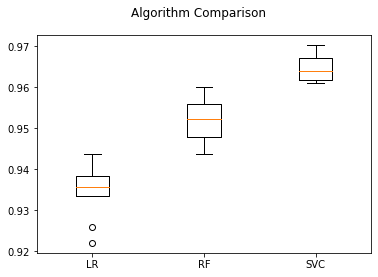

In [58]:
# Comparación de las técnicas aplicadas mediante cross validation por medio
# de diagramas de caja y bigotes
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()